In [1]:
import pandas as pd
metadata = pd.read_csv("ADNIMERGE.csv")
metadata

C:\Users\air\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,21,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-09-08,CN,74.3,Male,...,NaN,1.36665,NaN,NaN,NaN,0.000000,0.00000,0,0,2021-12-08 04:59:14.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-09-12,AD,81.3,Male,...,22.83,1.08355,NaN,NaN,NaN,0.000000,0.00000,0,0,2021-12-08 04:59:14.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-03-13,AD,81.3,Male,...,22.83,1.08355,NaN,NaN,NaN,0.498289,5.96721,6,6,2021-12-08 04:59:14.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-09-12,AD,81.3,Male,...,22.83,1.08355,NaN,NaN,NaN,0.999316,11.96720,12,12,2021-12-08 04:59:14.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-09-12,AD,81.3,Male,...,22.83,1.08355,NaN,NaN,NaN,1.998630,23.93440,24,24,2021-12-08 04:59:14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15775,4149,ADNI3,ADNI2,031_S_4149,31,m114,2020-12-07,EMCI,73.3,Male,...,18.54,1.31762,NaN,1.157,NaN,9.303220,111.41000,114,114,2022-02-10 05:01:06.0
15776,4149,ADNI3,ADNI2,031_S_4149,31,m126,2021-11-20,EMCI,73.3,Male,...,18.54,1.31762,NaN,1.157,NaN,10.256000,122.82000,120,126,2022-02-10 05:01:06.0
15777,679,ADNI3,ADNI1,041_S_0679,41,m186,2022-02-08,LMCI,62.9,Male,...,NaN,1.42776,NaN,NaN,NaN,15.515400,185.80300,186,186,2022-02-12 05:00:41.0
15778,6147,ADNI3,ADNI3,127_S_6147,127,m48,2022-02-09,SMC,69.6,Male,...,NaN,NaN,NaN,NaN,1.1242,3.969880,47.54100,48,48,2022-02-12 05:00:58.0


In [2]:
data1 = metadata[["PTID","DX","Month"]]
data1

,PTID,DX,Month
0,011_S_0002,CN,0
1,011_S_0003,Dementia,0
2,011_S_0003,Dementia,6
3,011_S_0003,Dementia,12
4,011_S_0003,Dementia,24
...,...,...,...
15775,031_S_4149,NaN,114
15776,031_S_4149,NaN,120
15777,041_S_0679,NaN,186
15778,127_S_6147,NaN,48


In [3]:
data1.isnull().sum()

PTID        0
DX       4751
Month       0
dtype: int64

In [4]:
data2=data1.drop_duplicates()
data2

,PTID,DX,Month
0,011_S_0002,CN,0
1,011_S_0003,Dementia,0
2,011_S_0003,Dementia,6
3,011_S_0003,Dementia,12
4,011_S_0003,Dementia,24
...,...,...,...
15775,031_S_4149,NaN,114
15776,031_S_4149,NaN,120
15777,041_S_0679,NaN,186
15778,127_S_6147,NaN,48


In [5]:
data=data2.dropna(axis=0,subset = ["DX"]) 
data=data.sort_values(by=['PTID','Month'])
data.reset_index(drop=True,inplace=True)
data

,PTID,DX,Month
0,002_S_0295,CN,0
1,002_S_0295,CN,6
2,002_S_0295,CN,12
3,002_S_0295,CN,24
4,002_S_0295,CN,36
...,...,...,...
11014,941_S_6803,MCI,0
11015,941_S_6854,Dementia,0
11016,941_S_6854,Dementia,12
11017,941_S_6962,Dementia,0


In [6]:
data.isnull().sum()

PTID     0
DX       0
Month    0
dtype: int64

In [7]:
len(data.PTID.unique())

2344

In [8]:
data.PTID.value_counts()

003_S_0908    17
068_S_0127    16
003_S_1122    16
021_S_0178    16
037_S_0377    15
              ..
021_S_4633     1
141_S_4907     1
094_S_6468     1
153_S_6450     1
305_S_6899     1
Name: PTID, Length: 2344, dtype: int64

In [9]:
len(data.Month.unique())

33

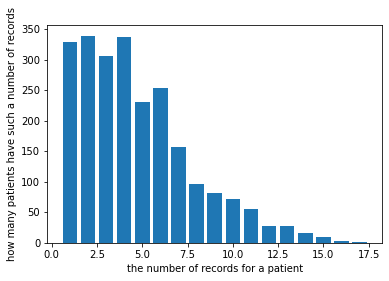

In [10]:
import matplotlib.pyplot as plt

plt.bar(data.PTID.value_counts().value_counts().index,data.PTID.value_counts().value_counts())
plt.xlabel("the number of records for a patient")
plt.ylabel("how many patients have such a number of records")
plt.show()

In [11]:
data.DX.unique()

array(['CN', 'Dementia', 'MCI'], dtype=object)

In [12]:
flag=[]
for i in range(len(data)):
    if(data.DX[i]=="MCI"):
        p_id=data.PTID[i]
        p_m=data.Month[i]
        state="MCI-MCI"
        for j in range(16):
            if i+j in data.index:
                if data.PTID[i+j]==p_id and data.DX[i+j]=="Dementia":
                    state="MCI-AD"
                    break
                elif data.PTID[i+j]==p_id and data.DX[i+j]=="CN":
                    state="MCI-CN"
                    break
            else:
                break
        flag.append(state)
    else:
        flag.append(data.DX[i])
        
flag

['CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'MCI-AD',
 'MCI-AD',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'MCI-AD',
 'MCI-AD',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'Dementia',
 'MCI-AD',
 'MCI-AD',
 'MCI-AD',
 'Dementia',
 'Dementia',
 'Dementia',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'MCI-MCI',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',
 'CN',


In [13]:
data['F']=flag
data

,PTID,DX,Month,F
0,002_S_0295,CN,0,CN
1,002_S_0295,CN,6,CN
2,002_S_0295,CN,12,CN
3,002_S_0295,CN,24,CN
4,002_S_0295,CN,36,CN
...,...,...,...,...
11014,941_S_6803,MCI,0,MCI-MCI
11015,941_S_6854,Dementia,0,Dementia
11016,941_S_6854,Dementia,12,Dementia
11017,941_S_6962,Dementia,0,Dementia


In [14]:
data.F.value_counts()

CN          3818
MCI-MCI     3064
Dementia    2392
MCI-AD      1387
MCI-CN       358
Name: F, dtype: int64

In [15]:
sMCI_patient=[]
pMCI_patient=[]
for i in range(len(data)):
    if data.F[i]=="MCI-AD":
        pMCI_patient.append(data.PTID[i])
    elif data.F[i]=="MCI-CN":
        sMCI_patient.append(data.PTID[i])

sMCI=list(set(sMCI_patient))
pMCI=list(set(pMCI_patient))
print(len(sMCI))
print(len(pMCI))

109
399


In [16]:
sMCI #5

['037_S_4381',
 '067_S_4212',
 '068_S_2315',
 '018_S_2180',
 '003_S_1074',
 '067_S_6525',
 '128_S_2123',
 '011_S_0002',
 '013_S_4268',
 '128_S_0138',
 '100_S_4556',
 '094_S_1241',
 '037_S_4750',
 '127_S_4624',
 '301_S_6326',
 '067_S_2301',
 '012_S_1009',
 '021_S_4419',
 '029_S_5135',
 '022_S_2263',
 '037_S_4214',
 '010_S_0420',
 '009_S_4359',
 '041_S_4004',
 '041_S_4051',
 '129_S_2332',
 '018_S_6414',
 '131_S_0384',
 '024_S_6033',
 '068_S_2184',
 '137_S_0722',
 '100_S_0069',
 '128_S_1408',
 '037_S_4706',
 '009_S_4543',
 '006_S_4960',
 '022_S_4444',
 '032_S_4277',
 '031_S_2018',
 '130_S_4883',
 '053_S_4813',
 '068_S_4332',
 '041_S_5097',
 '941_S_4187',
 '301_S_6297',
 '016_S_2007',
 '067_S_4072',
 '128_S_0522',
 '109_S_4499',
 '137_S_0668',
 '006_S_4713',
 '002_S_4799',
 '003_S_5130',
 '109_S_4380',
 '141_S_1245',
 '067_S_4310',
 '128_S_2002',
 '013_S_4395',
 '002_S_6652',
 '128_S_4607',
 '052_S_1352',
 '006_S_6243',
 '009_S_0842',
 '067_S_4767',
 '067_S_2304',
 '099_S_0551',
 '137_S_06

In [17]:
pMCI #7

['114_S_0166',
 '024_S_0985',
 '041_S_1425',
 '023_S_0855',
 '018_S_0406',
 '128_S_0947',
 '123_S_0390',
 '116_S_1271',
 '067_S_4782',
 '005_S_0572',
 '023_S_0376',
 '137_S_0973',
 '012_S_4094',
 '023_S_4243',
 '036_S_4538',
 '052_S_1346',
 '127_S_1032',
 '019_S_4680',
 '031_S_0568',
 '041_S_4974',
 '007_S_0249',
 '057_S_0941',
 '126_S_0708',
 '009_S_1030',
 '021_S_0231',
 '011_S_1282',
 '037_S_4432',
 '007_S_0698',
 '128_S_0135',
 '052_S_0671',
 '126_S_4458',
 '002_S_1268',
 '041_S_1423',
 '011_S_2274',
 '057_S_0839',
 '036_S_4715',
 '073_S_0909',
 '116_S_1249',
 '137_S_0631',
 '021_S_4402',
 '098_S_0160',
 '137_S_4623',
 '036_S_4899',
 '126_S_4507',
 '136_S_4189',
 '123_S_0162',
 '027_S_6788',
 '031_S_4005',
 '032_S_0187',
 '037_S_4706',
 '116_S_1243',
 '009_S_4530',
 '137_S_4815',
 '021_S_5237',
 '023_S_0331',
 '062_S_1299',
 '082_S_0641',
 '029_S_1318',
 '006_S_4346',
 '035_S_0292',
 '041_S_4138',
 '013_S_0860',
 '002_S_4171',
 '002_S_4262',
 '009_S_4958',
 '052_S_4945',
 '136_S_08

In [20]:
data[data['PTID']=="114_S_0166"]

,PTID,DX,Month,F
7773,114_S_0166,CN,0,CN
7774,114_S_0166,CN,6,CN
7775,114_S_0166,CN,12,CN
7776,114_S_0166,CN,24,CN
7777,114_S_0166,CN,36,CN
7778,114_S_0166,Dementia,60,Dementia
7779,114_S_0166,MCI,72,MCI-AD
7780,114_S_0166,Dementia,84,Dementia
7781,114_S_0166,Dementia,96,Dementia
7782,114_S_0166,Dementia,108,Dementia
